4


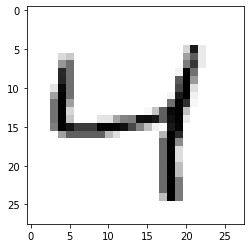

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='' # force no CUDA 

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

image_index = 2
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])

history = model.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4862 - acc: 0.8788 - val_loss: 0.3096 - val_acc: 0.9158
Epoch 2/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3060 - acc: 0.9157 - val_loss: 0.2822 - val_acc: 0.9222
Epoch 3/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2855 - acc: 0.9211 - val_loss: 0.2721 - val_acc: 0.9252
Epoch 4/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2750 - acc: 0.9241 - val_loss: 0.2715 - val_acc: 0.9240
Epoch 5/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2682 - acc: 0.9264 - val_loss: 0.2659 - val_acc: 0.9253
Epoch 6/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2627 - acc: 0.9288 - val_loss: 0.2655 - val_acc: 0.9267
Epoch 7/30
60000/60000 [====================

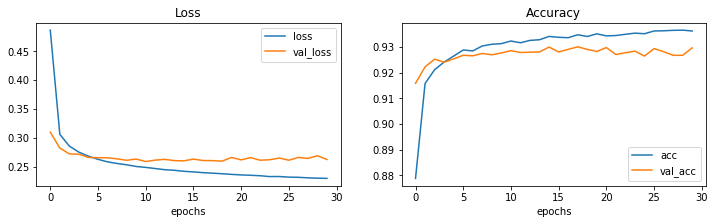

10000/10000 [==============================] - 0s 28us/sample - loss: 0.2624 - acc: 0.9296
loss=0.2623836439758539, accuracy=0.9296000003814697


In [3]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epochs')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(range(len(history.history['acc'])), history.history['acc'])
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.xlabel('epochs')

plt.show()

(loss, accuracy) = model.evaluate(x_test, y_test)

print(f'loss={loss}, accuracy={accuracy}')

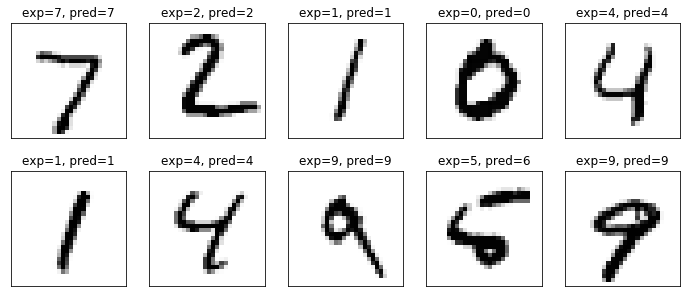

In [13]:
import numpy as np
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    expected = y_test[i]
    predicted = np.argmax(model.predict(x=np.expand_dims(x_test[i], axis=0)))
    plt.title(f'exp={expected}, pred={predicted}')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap='Greys')
plt.show()